In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import cv2
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd



Bad key text.latex.preview in file C:\Users\user\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\user\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\user\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably

In [2]:
development_toolkit_dir = "C:/Users/user/Desktop/Msc Robotics Heriot Watt/Data Mining and Machine Learning/Data set/development_kit/data"
image_train_dir = "C:/Users/user/Desktop/Msc Robotics Heriot Watt/Data Mining and Machine Learning/Data set/images"

In [3]:
images=[] #This list will contain every images read through opencv
train_txt= '/train.txt' #This is the file giving the location of every images for the training set

In [4]:
#We load the development kit tool to prepare the dataset
path = development_toolkit_dir + train_txt 
file = open(path,'r') 
#We open the txt folder, read through each lines and store them in the 'lines' list
lines = file.readlines()
file.close()
#Create a 100,000 long list that will store the location of every train set images
filename= [None]*len(lines)
i=0

for line in lines:
    #tmp[line]=line.split(" ")
    #print(line[:-3])
    filename[i]=line[:-3] #Keep the entire string up to the last 3 characters corresponding to the categories
    i=i+1 #increment
    


In [5]:
#Create Image dataset
images=[]
for image_path in filename[0:20000]: #smallbatch for test
    image_w= cv2.imread(f'{image_train_dir}/{image_path}', cv2.IMREAD_COLOR)
    image_bw = cv2.cvtColor(image_w, cv2.COLOR_BGR2GRAY)
    images.append(image_bw)
                

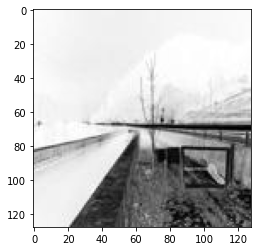

In [6]:
some_place = images[5321]
#some_place_image = some_digit.reshape(28, 28)
plt.imshow(some_place, cmap=mpl.cm.binary)
plt.show()

In [7]:
filename[5321]

'train/a/aqueduct/00000322.jpg'

In [8]:
filename[5321].split("/")[2]

'aqueduct'

In [9]:
location = []
for i in range(len(filename)):
    location.append(filename[i].split("/")[2])

In [10]:
location[5321]

'aqueduct'

In [11]:
images_arr = np.stack(images)
images_arr_rs = images_arr.reshape((len(images),-1))

In [12]:
X = pd.DataFrame(data=images_arr_rs, columns=['pixels_'+str(i+1) for i in range(images_arr_rs.shape[1])])

In [13]:
X

,pixels_1,pixels_2,pixels_3,pixels_4,pixels_5,pixels_6,pixels_7,pixels_8,pixels_9,pixels_10,...,pixels_16375,pixels_16376,pixels_16377,pixels_16378,pixels_16379,pixels_16380,pixels_16381,pixels_16382,pixels_16383,pixels_16384
0,27,32,46,57,66,82,84,68,61,60,...,37,32,41,30,42,48,33,41,70,87
1,115,137,116,151,151,149,174,219,238,248,...,116,119,122,121,123,121,107,88,78,79
2,210,212,214,216,216,218,220,222,225,227,...,81,82,81,77,72,64,56,45,34,26
3,22,27,7,36,31,30,40,69,66,27,...,20,20,22,22,22,23,23,24,24,24
4,127,127,127,128,128,128,129,129,128,128,...,116,116,113,117,120,120,116,114,114,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,115,116,117,117,116,115,113,111,114,113,...,45,45,41,41,40,38,37,35,35,35
19996,176,204,237,252,246,237,235,239,241,240,...,178,162,165,154,135,140,157,147,146,173
19997,23,19,19,27,36,37,29,20,20,15,...,211,199,204,194,203,207,191,187,185,169
19998,14,14,15,16,17,19,21,22,15,17,...,59,58,69,90,110,104,74,40,25,24


In [14]:
# X = df.to_numpy()

In [15]:
# X

In [16]:
print(X.shape)
print(len(images))

(20000, 16384)
20000


In [17]:
# X = np.zeros( [len(images),images[0].shape[0] * images[0].shape[1] ])
# for i in range(len(images)):
#     de = 0
#     for j in range(images[i].shape[0]):
#         for k in range(images[i][j].shape[0]):
#             X[i][de] =  images[i][j][k]
#             de += 1
#             #print(de, i , j , k)
            
# y = location

In [18]:
y = location
y = pd.Series(y)

In [19]:
print(len(X))
print(len(y))

y = y[:20000] #for small batch
print(len(y))

20000
100000
20000


In [20]:
#for small batch(test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
y_train_5 = (y_train == "abbey") # True for all abbey, False for all other digits
y_test_5 = (y_test == "abbey")

In [22]:
y

0            abbey
1            abbey
2            abbey
3            abbey
4            abbey
           ...    
19995    boat_deck
19996    boat_deck
19997    boat_deck
19998    boat_deck
19999    boat_deck
Length: 20000, dtype: object

In [23]:
# from sklearn.linear_model import SGDClassifier

# sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
# sgd_clf.fit(X_train, y_train_5)

In [24]:
# sgd_clf.predict(X_test) 

In [25]:
# y_test

In [26]:
# from sklearn.model_selection import cross_val_score
# cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [27]:
# from sklearn.base import BaseEstimator
# class Never5Classifier(BaseEstimator):
#     def fit(self, X, y=None):
#         pass
#     def predict(self, X):
#         return np.zeros((len(X), 1), dtype=bool)

In [28]:
# never_5_clf = Never5Classifier()
# cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [29]:
# from sklearn.model_selection import cross_val_predict

# y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [30]:
# from sklearn.metrics import confusion_matrix

# confusion_matrix(y_train_5, y_train_pred)

In [31]:
# y_train_perfect_predictions = y_train_5  # pretend we reached perfection
# confusion_matrix(y_train_5, y_train_perfect_predictions)

# MultinomialNB

In [32]:
# from sklearn.naive_bayes import MultinomialNB
# modelMulti = MultinomialNB()
# modelMulti.fit(X_train, y_train)

In [33]:
# modelMulti.predict(X_test) 

In [34]:
# y_test

In [35]:
# cross_val_score(modelMulti, X_train, y_train, cv=3, scoring="accuracy")

In [36]:
# y_train_pred_Mutli = cross_val_predict(modelMulti, X_train, y_train, cv=3)
# confusion_matrix(y_train, y_train_pred_Mutli)

# Gaussian Naive Bayes

In [37]:
# from sklearn.naive_bayes import GaussianNB
# modelGauss = GaussianNB()
# modelGauss.fit(X_train, y_train)

In [38]:
# modelGauss.predict(X_test) 

In [39]:
# y_test

In [40]:
# cross_val_score(modelGauss, X_train, y_train, cv=3, scoring="accuracy")

In [41]:
# y_train_pred_Gauss = cross_val_predict(modelGauss, X_train, y_train, cv=3)
# confusion_matrix(y_train, y_train_pred_Gauss)

# Complement Naive Bayes

In [42]:
# from sklearn.naive_bayes import ComplementNB
# modelComplement = ComplementNB()
# modelComplement.fit(X_train, y_train)

In [43]:
# modelComplement.predict(X_test) 

In [44]:
# y_test

In [45]:
# cross_val_score(modelComplement, X_train, y_train, cv=3, scoring="accuracy")

In [46]:
# y_train_pred_Complement = cross_val_predict(modelComplement, X_train, y_train, cv=3)
# confusion_matrix(y_train, y_train_pred_Complement)

# Bernoulli Naive Bayes

In [47]:
# from sklearn.naive_bayes import BernoulliNB
# modelBernoulli = BernoulliNB()
# modelBernoulli.fit(X_train, y_train)

In [48]:
# modelBernoulli.predict(X_test) 

In [49]:
# y_test

In [50]:
# cross_val_score(modelBernoulli, X_train, y_train, cv=3, scoring="accuracy")

In [51]:
# y_train_pred_Bernoulli = cross_val_predict(modelBernoulli, X_train, y_train, cv=3)
# confusion_matrix(y_train, y_train_pred_Bernoulli)

# Categorical Naive Bayes

In [52]:
# from sklearn.naive_bayes import CategoricalNB
# modelCategorical = CategoricalNB()
# modelCategorical.fit(X_train, y_train)

In [53]:
# modelCategorical.predict(X_test) 

In [54]:
# y_test

In [55]:
# cross_val_score(modelCategorical, X_train, y_train, cv=3, scoring="accuracy")

In [56]:
# y_train_pred_Categorical = cross_val_predict(modelCategorical, X_train, y_train, cv=3)
# confusion_matrix(y_train, y_train_pred_Categorical)

# Complex Bayes net 
(optional)

I don't know

## Week 8

In [57]:
# # Python ≥3.5 is required
# import sys
# assert sys.version_info >= (3, 5)

# # Scikit-Learn ≥0.20 is 
# import sklearn
# assert sklearn.__version__ >= "0.20"

# # Common imports
# import numpy as np
# import os

# # to make this notebook's output stable across runs
# np.random.seed(42)

# # To plot pretty figures
# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [59]:
# from sklearn.model_selection import cross_val_score
# tree_clf = DecisionTreeClassifier(random_state=42)
# # cross_val_score(tree_clf,X_train,y_train, cv=10)

In [60]:
# for depth in [2,3,4,5]:
#     print (f"\nDepth={depth}")
#     tree_clf = DecisionTreeClassifier(max_depth=depth)
#     print(np.mean(cross_val_score(tree_clf,X_train,y_train,cv=10)))
#     tree_clf.fit(X_train, y_train)
#     plot_tree(tree_clf)

### Logistic Regression

In [61]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
# cross_val_score(logreg, X_train, y_train, cv=3, scoring="accuracy")
# y_train_pred_reg = cross_val_predict(logreg, X_train, y_train, cv=3)
# y_pred_probs = logreg.predict_proba(X_test)[:, 1]
# print(y_pred_probs[0])

### Plotting the ROC curve

In [62]:
# from sklearn.metrics import roc_curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Logistic Regression ROC Curve')
# plt.show()

### ROC AUC

In [63]:
# from sklearn.metrics import roc_auc_score
# print(roc_auc_score(y_test, y_pred_probs))

In [64]:
# confusion_matrix(y_train, y_train_pred_reg)

In [65]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [66]:
import sklearn
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)
from sklearn.linear_model import Perceptron

In [ ]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)